# Ripple Carry Adder

## 1.Intro

An important component in standard hardware is the implementation of an ALU which would realise the basic operations needed for everything from basic logical operations to arithmetical ones in order to execute higher order operations by separating them.

## 2. Problem Statemnent

In quantum circuits a basic ALU would be needed in order to accomplish higher order operations and to be able to encapsulate unitary operations which are the basis of quantum algorithms.

## 3.Implementation

 The implemented ALU would be a simplified version consisting of encapsulating an operation on 1 qubit.
 The basic inputs would be the 2 input qubits and a carryin/reduce qubit and selection qubits to select the operations and some clean qubits which would be used in the process.
 
 The output would need to give enough information in order to be able to reconstruct the inputs so the 2 input qubits must also be an output and the substract/carry in qubit would be converted to a carryout/subsctract_nxt qubit.
 
 Another output would be the result of the operation.  And also in order to be able to detect the operation the selection qubits need to be present as an output.
 
 A basic goal of a quantum circuit would be the reversible aspect so the flow of the circuit could be reversed and the inputs reproduced.

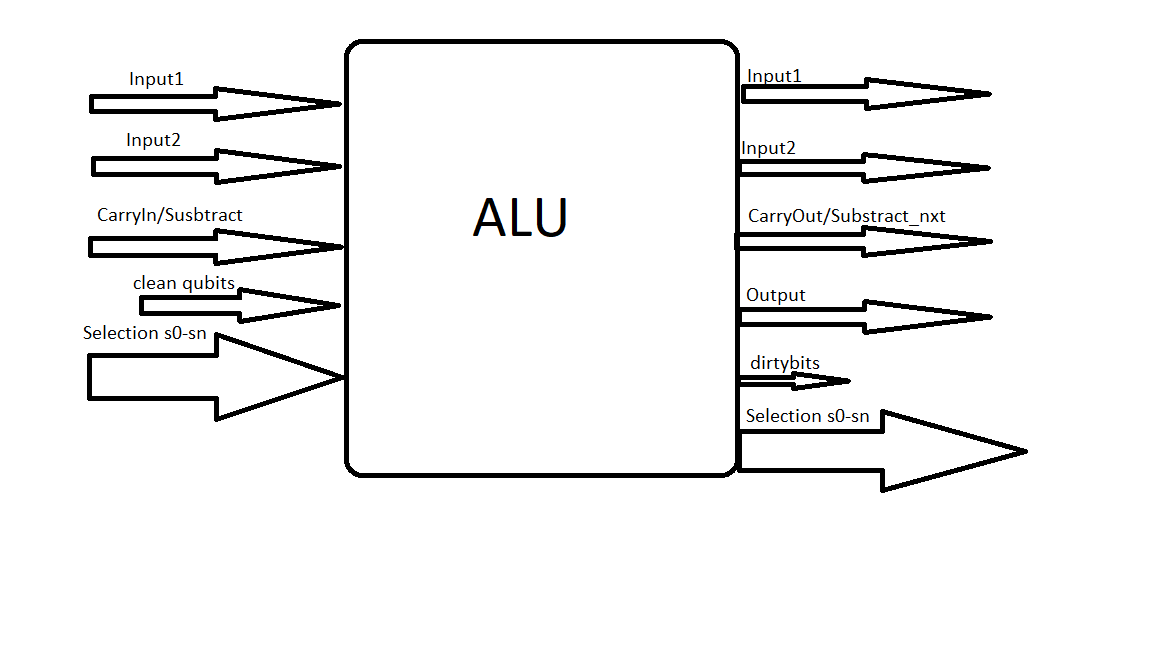

## 4.Annotated code 

In [12]:
import numpy as np
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [16]:
q = QuantumRegister(6)
c = ClassicalRegister(6)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2]) #Carry in

#circuit.h(q[3])
#circuit.h(q[4])

circuit.cx(0,5)
circuit.cx(1,5) #I4 = A xor B
circuit.cx(1,5)
circuit.cx(0,5)

circuit.x(0)
circuit.x(1)
circuit.ccx(0,1,5) 
circuit.x(5)  # I3 = A or B
circuit.x(5)
circuit.ccx(0,1,5)
circuit.x(0)
circuit.x(1)


circuit.cx(0,1)
circuit.ccx(0,1,5) #I2 = A and B
circuit.ccx(0,1,5)
circuit.cx(0,1)


circuit.ccx(0,1,5)
circuit.cx(0,1)
circuit.ccx(1,2,5) #I1 = A+B+Cin
circuit.cx(1,2) 
circuit.cx(1,2)
circuit.ccx(1,2,5)
circuit.cx(1,2) #Cout
circuit.cx(0,1)
circuit.ccx(0,1,5)


circuit.measure(q,c)

In [17]:
circuit.draw()


Total count are:
000011 -> 148
000001 -> 135
000110 -> 128
000100 -> 128
000101 -> 122
000010 -> 119
000111 -> 113
000000 -> 107


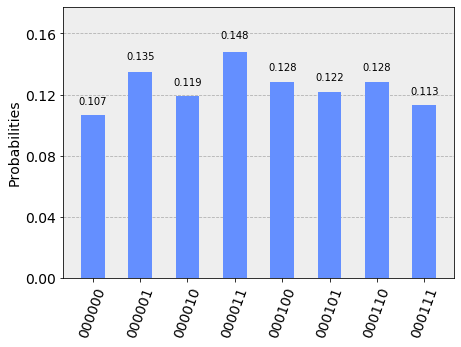

In [18]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count are:")#,counts)
sorted_x = sorted(counts.items(), key=lambda kv: kv[1],reverse=True)
import collections
sorted_dict = collections.OrderedDict(sorted_x)
for cnt in sorted_dict.keys():
    print(str(cnt)+" -> "+str(sorted_dict[cnt]))
plot_histogram(counts)

Result(backend_name='statevector_simulator', backend_version='0.3.2', date=datetime.datetime(2019, 11, 16, 9, 59, 45, 492683), header=Obj(backend_name='statevector_simulator', backend_version='0.3.2'), job_id='fa88eb2e-cf0c-4242-8a9c-b4442be8391c', metadata={'max_memory_mb': 4033, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0003019}, qobj_id='b469d12a-47ff-4e5d-bf54-37f47c4992e2', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x24=1), statevector=[0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (1+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j,

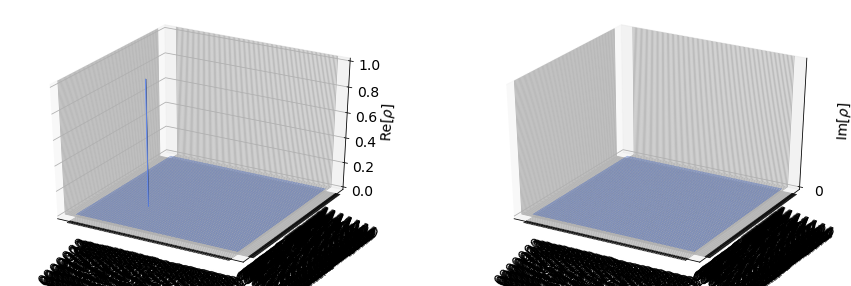

In [19]:
backend = Aer.get_backend('statevector_simulator')
job1 = execute(circuit, backend, shots=1000)
job1 = execute(circuit, backend, shots=1000)
result1 = job1.result()

print(result1)
outputstate = result1.get_statevector(circuit, decimals=3)
print(outputstate)
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)